In [95]:
import pandas as pd
from pymongo import MongoClient
conn = "mongodb://127.0.0.1:27017/"
client = MongoClient(conn)
database = client["project_bdnsql"]
data = database["Healthcare-Diabetes"]

## Functions

In [96]:
def getDocumentPd(ascending:bool,limit:int):
    df = pd.DataFrame(list(data.find()))
    df_sorted = df.sort_values(by='Id',ascending=ascending)
    return df_sorted if not limit else df_sorted.head(limit)

def getDocument():
    return list(data.find())


## 3. Implemente os métodos para inserir, editar, buscar e excluir, sendo:

### a. apresente a coleção ou coleções existente(s) no banco de dados.

Esse script mostra os 10 primeiros documentos em ordem do menor para o maior.

In [97]:
getDocumentPd(True, 10)

,_id,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,684996d8c636c293a97eac8f,1,6,148,72,35,0,33.6,0.627,50,1
17,684996d8c636c293a97eac9e,2,1,85,66,29,0,26.6,0.351,31,0
0,684996d8c636c293a97eac8d,3,8,183,64,0,0,23.3,0.672,32,1
19,684996d8c636c293a97eaca0,4,1,89,66,23,94,28.1,0.167,21,0
1,684996d8c636c293a97eac8e,5,0,137,40,35,168,43.1,2.288,33,1
3,684996d8c636c293a97eac90,6,5,116,74,0,0,25.6,0.201,30,0
4,684996d8c636c293a97eac91,7,3,78,50,32,88,31.0,0.248,26,1
5,684996d8c636c293a97eac92,8,10,115,0,0,0,35.3,0.134,29,0
6,684996d8c636c293a97eac93,9,2,197,70,45,543,30.5,0.158,53,1
7,684996d8c636c293a97eac94,10,8,125,96,0,0,0.0,0.232,54,1


### b. em cada coleção, insira 5 documentos de dados extras.

In [98]:
import random

last = data.find_one(sort=[("Id", -1)])
next_id = last['Id'] + 1 if last and "Id" in last  else 1

objects = []
for i in range(5):
    objects.append({
        "Id": next_id + i,
        "Pregnancies": random.randint(0, 10),
        "Glucose": random.randint(70, 200),
        "BloodPressure": random.randint(50, 120),
        "SkinThickness": random.randint(10, 50),
        "Insulin": random.randint(15, 300),
        "BMI": round(random.uniform(18.0, 45.0), 1),
        "DiabetesPedigreeFunction": round(random.uniform(0.1, 2.5), 2),
        "Age": random.randint(18, 80),
        "Outcome": random.randint(0, 1)
    })

print(objects)
data.insert_many(objects)
getDocumentPd(False, 5)

[{'Id': 2769, 'Pregnancies': 9, 'Glucose': 165, 'BloodPressure': 84, 'SkinThickness': 10, 'Insulin': 44, 'BMI': 38.1, 'DiabetesPedigreeFunction': 0.22, 'Age': 40, 'Outcome': 0}, {'Id': 2770, 'Pregnancies': 3, 'Glucose': 196, 'BloodPressure': 72, 'SkinThickness': 25, 'Insulin': 167, 'BMI': 23.7, 'DiabetesPedigreeFunction': 1.59, 'Age': 51, 'Outcome': 0}, {'Id': 2771, 'Pregnancies': 9, 'Glucose': 160, 'BloodPressure': 114, 'SkinThickness': 50, 'Insulin': 231, 'BMI': 38.2, 'DiabetesPedigreeFunction': 0.54, 'Age': 41, 'Outcome': 0}, {'Id': 2772, 'Pregnancies': 10, 'Glucose': 73, 'BloodPressure': 68, 'SkinThickness': 36, 'Insulin': 31, 'BMI': 34.4, 'DiabetesPedigreeFunction': 1.76, 'Age': 45, 'Outcome': 1}, {'Id': 2773, 'Pregnancies': 4, 'Glucose': 85, 'BloodPressure': 70, 'SkinThickness': 31, 'Insulin': 101, 'BMI': 29.5, 'DiabetesPedigreeFunction': 2.26, 'Age': 27, 'Outcome': 0}]


,_id,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2772,685da94b58995f4c21d71f52,2773,4,85,70,31,101,29.5,2.26,27,0
2771,685da94b58995f4c21d71f51,2772,10,73,68,36,31,34.4,1.76,45,1
2770,685da94b58995f4c21d71f50,2771,9,160,114,50,231,38.2,0.54,41,0
2769,685da94b58995f4c21d71f4f,2770,3,196,72,25,167,23.7,1.59,51,0
2768,685da94b58995f4c21d71f4e,2769,9,165,84,10,44,38.1,0.22,40,0


### c. editar 2 opções diferentes de dados (independente do documento) .

In [99]:
data.update_one(
    {"Id": last['Id']},  
    {"$set": {"Glucose": 180, "Age": 40}}
)

data.update_one(
    {"Id": last['Id'] - 1},  
    {"$set": {"Glucose": 150, "Outcome": 1}}
)

UpdateResult({'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

In [100]:
getDocumentPd(False, 2)

,_id,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2772,685da94b58995f4c21d71f52,2773,4,85,70,31,101,29.5,2.26,27,0
2771,685da94b58995f4c21d71f51,2772,10,73,68,36,31,34.4,1.76,45,1


### d. permita realizar a busca por todos os documentos de cada coleção.

In [101]:
print(getDocument())

[{'_id': ObjectId('684996d8c636c293a97eac8d'), 'Id': 3, 'Pregnancies': 8, 'Glucose': 183, 'BloodPressure': 64, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 23.3, 'DiabetesPedigreeFunction': 0.672, 'Age': 32, 'Outcome': 1}, {'_id': ObjectId('684996d8c636c293a97eac8e'), 'Id': 5, 'Pregnancies': 0, 'Glucose': 137, 'BloodPressure': 40, 'SkinThickness': 35, 'Insulin': 168, 'BMI': 43.1, 'DiabetesPedigreeFunction': 2.288, 'Age': 33, 'Outcome': 1}, {'_id': ObjectId('684996d8c636c293a97eac8f'), 'Id': 1, 'Pregnancies': 6, 'Glucose': 148, 'BloodPressure': 72, 'SkinThickness': 35, 'Insulin': 0, 'BMI': 33.6, 'DiabetesPedigreeFunction': 0.627, 'Age': 50, 'Outcome': 1}, {'_id': ObjectId('684996d8c636c293a97eac90'), 'Id': 6, 'Pregnancies': 5, 'Glucose': 116, 'BloodPressure': 74, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 25.6, 'DiabetesPedigreeFunction': 0.201, 'Age': 30, 'Outcome': 0}, {'_id': ObjectId('684996d8c636c293a97eac91'), 'Id': 7, 'Pregnancies': 3, 'Glucose': 78, 'BloodPressure': 50, 'SkinThickness

### e. exclua 2 documentos em cada coleção.

In [102]:
ids_to_delete = [obj['Id'] for obj in objects]
data.delete_many({"Id": {"$in": ids_to_delete}})
getDocumentPd(False, 5)

,_id,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,684996d8c636c293a97eb758,2768,2,180,72,15,76,30.1,0.547,40,0
2762,684996d8c636c293a97eb757,2767,0,150,110,46,130,67.1,0.319,26,1
2761,684996d8c636c293a97eb756,2766,6,85,78,0,0,31.2,0.382,42,0
2765,684996d8c636c293a97eb75a,2765,8,179,72,42,130,32.7,0.719,36,1
2755,684996d8c636c293a97eb750,2764,2,75,64,24,55,29.7,0.370,33,0


## Qual é a média de glicose entre pessoas com e sem diabetes?

<Axes: xlabel='Group', ylabel='Glucose'>

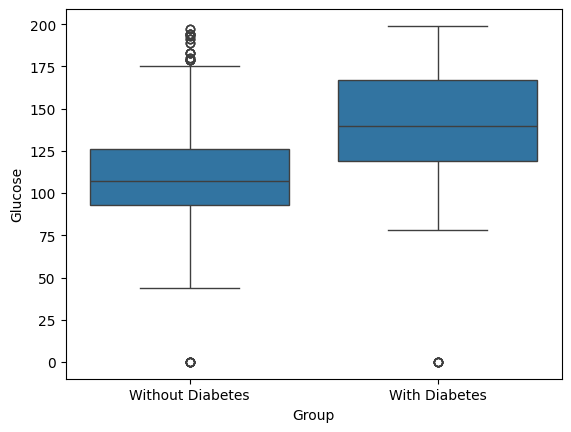

In [103]:
import seaborn as sns

glucose_with_diabetes = df[df['Outcome'] == 1]['Glucose'] # type: ignore
glucose_without_diabetes = df[df['Outcome'] == 0]['Glucose'] # type: ignore

df_plot = pd.DataFrame({
    'Glucose': pd.concat([glucose_without_diabetes, glucose_with_diabetes]),
    'Group': ['Without Diabetes'] * len(glucose_without_diabetes) + ['With Diabetes'] * len(glucose_with_diabetes)
})

sns.boxplot(x='Group', y='Glucose', data=df_plot)